# Lab1-Assignment

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

This notebook describes the assignment for Lab 1 of the text mining course. 

**Points**: each exercise is prefixed with the number of points you can obtain for the exercise.

We assume you have worked through the following notebooks:
* **Lab1.1-introduction**
* **Lab1.2-introduction-to-NLTK**
* **Lab1.3-introduction-to-spaCy** 

In this assignment, you will process an English text (**Lab1-apple-samsung-example.txt**) with both NLTK and spaCy and discuss the similarities and differences.

## Credits
The notebooks in this block have been originally created by [Marten Postma](https://martenpostma.github.io). Adaptations were made by [Filip Ilievski](http://ilievski.nl).

## Tip: how to read a file from disk
Let's open the file **Lab1-apple-samsung-example.txt** from disk.

In [169]:
from pathlib import Path

In [170]:
cur_dir = Path().resolve() # this should provide you with the folder in which this notebook is placed
path_to_file = Path.joinpath(cur_dir, 'Lab1-apple-samsung-example.txt')
print(path_to_file)
print('does path exist? ->', Path.exists(path_to_file))

C:\Users\dexter\Documents\VU_UvA\TMAI\ba-text-mining\lab_sessions\lab1\Lab1-apple-samsung-example.txt
does path exist? -> True


If the output from the code cell above states that **does path exist? -> False**, please check that the file **Lab1-apple-samsung-example.txt** is in the same directory as this notebook.

In [171]:
with open(path_to_file) as infile:
    text = infile.read()

print('number of characters', len(text))

number of characters 1139


## [total points: 4] Exercise 1: NLTK
In this exercise, we use NLTK to apply **Part-of-speech (POS) tagging**, **Named Entity Recognition (NER)**, and **Constituency parsing**. The following code snippet already performs sentence splitting and tokenization. 

In [172]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

In [173]:
sentences_nltk = sent_tokenize(text)

In [174]:
tokens_per_sentence = []
for sentence_nltk in sentences_nltk:
    sent_tokens = word_tokenize(sentence_nltk)
    tokens_per_sentence.append(sent_tokens)
print(tokens_per_sentence)

[['https', ':', '//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'Documents', 'filed', 'to', 'the', 'San', 'Jose', 'federal', 'court', 'in', 'California', 'on', 'November', '23', 'list', 'six', 'Samsung', 'products', 'running', 'the', '``', 'Jelly', 'Bean', "''", 'and', '``', 'Ice', 'Cream', 'Sandwich', "''", 'operating', 'systems', ',', 'which', 'Apple', 'claims', 'infringe', 'its', 'patents', '.'], ['The', 'six', 'phones', 'and', 'tablets', 'affected', 'are', 'the', 'Galaxy', 'S', 'III', ',', 'running', 'the', 'new', 'Jelly', 'Bean', 'system', ',', 'the', 'Galaxy', 'Tab', '8.9', 'Wifi', 'tablet', ',', 'the', 'Galaxy', 'Tab', '2', '10.1', ',', 'Galaxy', 'Rugby', 'Pro', 'and', 'Galaxy', 'S', 'III', 'mini', '.'], ['Apple', 'stated', 'it', 'had', '“', 'acted', 'quickly', 'and', 'diligently', "''", 'in', 'order', 'to', '``', 'determine', 'that', 'these', 'newly', 'released', 'products', 'do', 'infringe', 'many', 'of', 'the', 'sa

We will use lists to keep track of the output of the NLP tasks. We can hence inspect the output for each task using the index of the sentence.

In [175]:
sent_id = 1
print('SENTENCE', sentences_nltk[sent_id])
print('TOKENS', tokens_per_sentence[sent_id])

SENTENCE The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.
TOKENS ['The', 'six', 'phones', 'and', 'tablets', 'affected', 'are', 'the', 'Galaxy', 'S', 'III', ',', 'running', 'the', 'new', 'Jelly', 'Bean', 'system', ',', 'the', 'Galaxy', 'Tab', '8.9', 'Wifi', 'tablet', ',', 'the', 'Galaxy', 'Tab', '2', '10.1', ',', 'Galaxy', 'Rugby', 'Pro', 'and', 'Galaxy', 'S', 'III', 'mini', '.']


### [point: 1] Exercise 1a: Part-of-speech (POS) tagging
Use `nltk.pos_tag` to perform part-of-speech tagging on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [176]:
pos_tags_per_sentence = []
for tokens in tokens_per_sentence:
    pos_tags = nltk.pos_tag(tokens)
    print(pos_tags)
    pos_tags_per_sentence.append(pos_tags)
print()
print(pos_tags_per_sentence[1])

[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]
[('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NNP'

### [point: 1] Exercise 1b: Named Entity Recognition (NER)
Use `nltk.chunk.ne_chunk` to perform Named Entity Recognition (NER) on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [177]:
ner_tags_per_sentence = []
for pos_tags in pos_tags_per_sentence:
    ner_chunk = nltk.chunk.ne_chunk(pos_tags)
    ner_tags_per_sentence.append(ner_chunk)
print(ner_tags_per_sentence)

[Tree('S', [('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PERSON', [('Apple', 'NNP')]), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]), Tree('S', [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'),

### [points: 2] Exercise 1c: Constituency parsing
Use the `nltk.RegexpParser` to perform constituency parsing on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [178]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

In [179]:
constituency_output_per_sentence = []
for pos_tags in pos_tags_per_sentence:
    tokens_constituency_parsed = constituent_parser.parse(pos_tags)
    constituency_output_per_sentence.append(tokens_constituency_parsed)

In [180]:
print(constituency_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), ('San', 'NNP'), ('Jose', 'NNP'), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), ('California', 'NNP'), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), Tree('VP', [Tree('V', [('claims', 'VBZ')])]), Tree('VP', [Tree('V', [

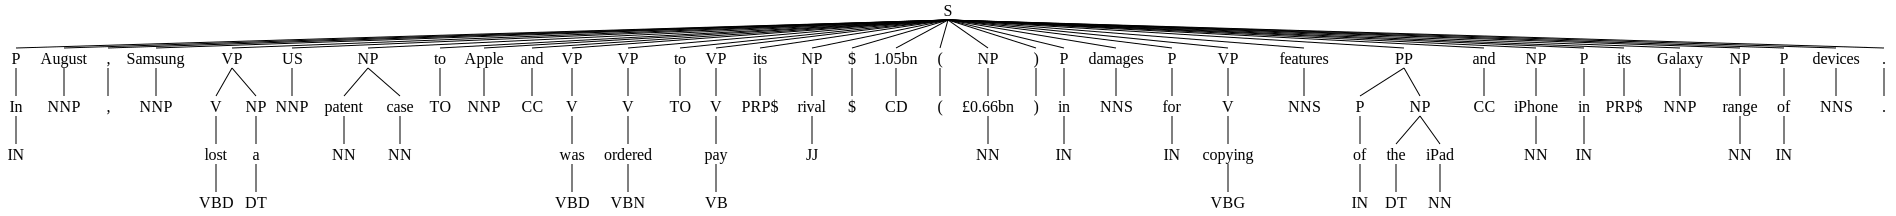

In [196]:
constituency_output_per_sentence[3]

Augment the RegexpParser so that it also detects Named Entity Phrases (NEP), e.g., that it detects *Galaxy S III* and *Ice Cream Sandwich*

In [181]:
constituent_parser_v2 = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
NEP: {<NNP>+}             # Multiple NNP''')

In [182]:
constituency_v2_output_per_sentence = []
for pos_tags in pos_tags_per_sentence:
    tokens_constituency_parsed_v2 = constituent_parser_v2.parse(pos_tags)
    constituency_v2_output_per_sentence.append(tokens_constituency_parsed_v2)

In [183]:
print(constituency_v2_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), Tree('NEP', [('San', 'NNP'), ('Jose', 'NNP')]), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), Tree('NEP', [('California', 'NNP')]), Tree('P', [('on', 'IN')]), Tree('NEP', [('November', 'NNP')]), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), Tree('NEP', [('Samsung', 'NNP')]), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), Tree('NEP', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), Tree('NEP', [('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP')]), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'

## [total points: 1] Exercise 2: spaCy
Use Spacy to process the same text as you analyzed with NLTK.

In [184]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [185]:
print(type(sentences_spacy[1]))
print(type(sentences_spacy_lemmatized[1]))

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.doc.Doc'>


In [186]:
doc = nlp(text)
sentences_spacy = list(doc.sents)
print(sentences_spacy[1])
# lemmatization
sentences_spacy_lemmatized = []
for sentence in sentences_spacy:
    sent_lemmas = [token.lemma_ for token in sentence]
    sent_lemmas_lemmatized = ' '.join(sent_lemmas)
    doc_lemmatized = nlp(sent_lemmas_lemmatized)
    sentences_spacy_lemmatized.append(doc_lemmatized)
print(sentences_spacy_lemmatized[1])
# tagging
sentences_spacy_lemmatized_tagged = []
for sentence in sentences_spacy_lemmatized:
    sent_tags = [(token.text, token.pos_) for token in sentence]
    sentences_spacy_lemmatized_tagged.append(sent_tags)
print(sentences_spacy_lemmatized_tagged[1])
# dependency parsing
sentences_spacy_lemmatized_tagged_parsed = []
for sentence in sentences_spacy_lemmatized:
    sent_parsed = [(token.text, token.dep_) for token in sentence]
    displacy.render(sentence, style='dep', jupyter=True, options={'distance': 150})
    sentences_spacy_lemmatized_tagged_parsed.append(sent_parsed)
print(sentences_spacy_lemmatized_tagged_parsed[1])


The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.

the six phone and tablet affect be the Galaxy S III , run the new Jelly Bean system , the Galaxy Tab 8.9 Wifi tablet , the Galaxy Tab 2 10.1 , Galaxy Rugby Pro and Galaxy S III mini . 

[('the', 'DET'), ('six', 'NUM'), ('phone', 'NOUN'), ('and', 'CCONJ'), ('tablet', 'NOUN'), ('affect', 'NOUN'), ('be', 'AUX'), ('the', 'DET'), ('Galaxy', 'PROPN'), ('S', 'PROPN'), ('III', 'PROPN'), (',', 'PUNCT'), ('run', 'VERB'), ('the', 'DET'), ('new', 'ADJ'), ('Jelly', 'PROPN'), ('Bean', 'PROPN'), ('system', 'NOUN'), (',', 'PUNCT'), ('the', 'DET'), ('Galaxy', 'PROPN'), ('Tab', 'PROPN'), ('8.9', 'NUM'), ('Wifi', 'PROPN'), ('tablet', 'NOUN'), (',', 'PUNCT'), ('the', 'DET'), ('Galaxy', 'PROPN'), ('Tab', 'PROPN'), ('2', 'NUM'), ('10.1', 'NUM'), (',', 'PUNCT'), ('Galaxy', 'PROPN'), ('Rugby', 'PROPN'), ('Pro', 'PROPN'), ('

[('the', 'det'), ('six', 'nummod'), ('phone', 'nmod'), ('and', 'cc'), ('tablet', 'conj'), ('affect', 'nsubj'), ('be', 'ROOT'), ('the', 'det'), ('Galaxy', 'compound'), ('S', 'compound'), ('III', 'attr'), (',', 'punct'), ('run', 'conj'), ('the', 'det'), ('new', 'amod'), ('Jelly', 'compound'), ('Bean', 'compound'), ('system', 'dobj'), (',', 'punct'), ('the', 'det'), ('Galaxy', 'compound'), ('Tab', 'nmod'), ('8.9', 'nummod'), ('Wifi', 'compound'), ('tablet', 'appos'), (',', 'punct'), ('the', 'det'), ('Galaxy', 'compound'), ('Tab', 'conj'), ('2', 'nummod'), ('10.1', 'appos'), (',', 'punct'), ('Galaxy', 'compound'), ('Rugby', 'compound'), ('Pro', 'appos'), ('and', 'cc'), ('Galaxy', 'compound'), ('S', 'compound'), ('III', 'compound'), ('mini', 'conj'), ('.', 'punct'), ('\n', 'dep')]


small tip: You can use **sents = list(doc.sents)** to be able to use the index to access a sentence like **sents[2]** for the third sentence.


## [total points: 7] Exercise 3: Comparison NLTK and spaCy
We will now compare the output of NLTK and spaCy, i.e., in what do they differ?

### [points: 3] Exercise 3a: Part of speech tagging
Compare the output from NLTK and spaCy regarding part of speech tagging.

* To compare, you probably would like to compare sentence per sentence. Describe if the sentence splitting is different for NLTK than for spaCy. If not, where do they differ?

* Answer: NLTK splits on double colons ``"``, while spaCy splits on full stops. Some prepositions are tagged differently, spaCy prefer to assign ``IN`` for all of them.  

In [187]:
for sent_nltk, sent_spacy in zip(sentences_nltk[1:], sentences_spacy[1:]):
    print(sent_nltk)
    print(sent_spacy)
    print()

The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.
The six phones and tablets affected are the Galaxy S III, running the new Jelly Bean system, the Galaxy Tab 8.9 Wifi tablet, the Galaxy Tab 2 10.1, Galaxy Rugby Pro and Galaxy S III mini.


Apple stated it had “acted quickly and diligently" in order to "determine that these newly released products do infringe many of the same claims already asserted by Apple."
Apple stated it had “acted quickly and diligently" in order to "determine that these newly released products do infringe many of the same claims already asserted by Apple.

In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.
"
In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.

In [188]:
for pos_tags_per_sentence, sentences_spacy_lemmatized_tagged in zip(pos_tags_per_sentence[2:], sentences_spacy_lemmatized_tagged[2:]):
    print(pos_tags_per_sentence)
    print(sentences_spacy_lemmatized_tagged)
    print()

[('Apple', 'NNP'), ('stated', 'VBD'), ('it', 'PRP'), ('had', 'VBD'), ('“', 'NNP'), ('acted', 'VBD'), ('quickly', 'RB'), ('and', 'CC'), ('diligently', 'RB'), ("''", "''"), ('in', 'IN'), ('order', 'NN'), ('to', 'TO'), ('``', '``'), ('determine', 'VB'), ('that', 'IN'), ('these', 'DT'), ('newly', 'RB'), ('released', 'VBN'), ('products', 'NNS'), ('do', 'VBP'), ('infringe', 'VB'), ('many', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('claims', 'NNS'), ('already', 'RB'), ('asserted', 'VBN'), ('by', 'IN'), ('Apple', 'NNP'), ('.', '.'), ("''", "''")]
[('Apple', 'NOUN'), ('state', 'NOUN'), ('it', 'PRON'), ('have', 'AUX'), ('"', 'PUNCT'), ('act', 'VERB'), ('quickly', 'ADV'), ('and', 'CCONJ'), ('diligently', 'ADV'), ('"', 'PUNCT'), ('in', 'ADP'), ('order', 'NOUN'), ('to', 'PART'), ('"', 'PUNCT'), ('determine', 'VERB'), ('that', 'SCONJ'), ('these', 'DET'), ('newly', 'ADV'), ('release', 'NOUN'), ('product', 'NOUN'), ('do', 'AUX'), ('infringe', 'VERB'), ('many', 'ADJ'), ('of', 'ADP'), ('the',

* After checking the sentence splitting, select a sentence for which you expect interesting results and perhaps differences. Motivate your choice.


* Answer: The 3rd sentence is interesting because it contains a lot of named entities, including giant companies and technology inventions.

* Compare the output in `token.tag` from spaCy to the part of speech tagging from NLTK for each token in your selected sentence. Are there any differences? This is not a trick question; it is possible that there are no differences.

* Answer: The split are consistent, but the tags are different. For example, NLTK tags "Apple" as ``NNP`` while spaCy tags it as ``PROPN``.

### [points: 2] Exercise 3b: Named Entity Recognition (NER)
* Describe differences between the output from NLTK and spaCy for Named Entity Recognition. Which one do you think performs better?

* Answer: spaCy is better recognized named entities than NLTK. For example, NLTK does not recognize " South Korea" as a named entity, while spaCy does. spaCy seem to consider more context when recognizing named entities.

### [points: 2] Exercise 3c: Constituency/dependency parsing
Choose one sentence from the text and run constituency parsing using NLTK and dependency parsing using spaCy.
* describe briefly the difference between constituency parsing and dependency parsing
* describe differences between the output from NLTK and spaCy.

* Answer: Constituency parsing is a tree representation of the whole context, while  dependency parsing represents the relationships between words directly using dependencies. SpaCy provides a more comprehensive dependency parsing result than NLTK. For example, spaCy can recognize 7 relationships on word "lost" in the 3rd sentence, while NLTK only recognizes 2 relationships.

# End of this notebook